Importing

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Defining functions

In [2]:
def length_of_signal(table, genotype, threshold):
    list_max = []
    list_total = []
    for i,j in zip(["Siberian", "Far-Eastern","European","Omsk"],["Tag G1", "Tag B1", "Tag G3", "Tag R9"]):
        if genotype == i:
            gen_ = j
    for row in table[gen_]:
        if row >= threshold:
            try:
                list_max.append(list_max[-1]+1)
            except IndexError:
                list_max.append(1)
            list_total.append(1)
        else:
            list_max.append(0)
            list_total.append(0)
    return(max(list_max),sum(list_total))

In [2]:
def integrating(table, genotype, threshold):
    list_integr = []
    for i,j in zip(["Siberian", "Far-Eastern","European","Omsk"],["Tag G1", "Tag B1", "Tag G3", "Tag R9"]):
        if genotype == i:
            gen_ = j
    S = 0
    for row in table[gen_]:
        list_integr.append(row)
        if row > threshold:
            try:
                prev_row = list_integr[-1]
                if prev_row > threshold:
                    S += (prev_row - threshold) + (row - prev_row)/2
                else:
                    S += (row - threshold)/(row - prev_row)*(row - threshold)/2
            except IndexError:
                continue
        else:
            try:
                prev_row = list_integr[-1]
                if prev_row > threshold:
                    S += (prev_row - threshold)/(prev_row - row)*(prev_row - threshold)/2
            except IndexError:
                continue
    return(S)

In [4]:
def wrapper(path_to_file, path_to_folder, genotype, threshold):
    with open(path_to_file) as file:
        table_init = pd.read_csv(file, sep='\t')
    result_max, result_total = length_of_signal(table_init, genotype, threshold)
    for root, directory, filename in os.walk(path_to_folder):
        for name in filename:
            if "Raw_Data" in name:
                ind = filename.index(name)
                del(filename[ind])
    list_with_files = filename[:]
    list_with_results = []
    for scan in list_with_files:
        with open(os.path.join(path_to_folder+scan)) as file:
            table_recursive = pd.read_csv(file, sep='\t')
        list_with_results.append(length_of_signal(table_recursive, genotype, threshold))
    p_max_ = 0
    p_total_ = 0
    for i in range(len(list_with_results)):
        if list_with_results[i][0]  >= result_max:
            p_max_ += 1
        if list_with_results[i][1]  >= result_total:
            p_total_ += 1
    p_val_max = p_max_/len(list_with_results)
    p_val_total = p_total_/len(list_with_results)
    return(p_val_max, p_val_total, list_with_results)
        

In [3]:
def wrapper_int(path_to_file, path_to_folder, genotype, threshold):
    with open(path_to_file) as file:
        table_init = pd.read_csv(file, sep='\t')
    Square_ref = integrating(table_init, genotype, threshold)
    for root, directory, filename in os.walk(path_to_folder):
        for name in filename:
            if "Raw_Data" in name:
                ind = filename.index(name)
                del(filename[ind])
    list_with_files = filename[:]
    list_with_results = []
    for scan in list_with_files:
        with open(os.path.join(path_to_folder+scan)) as file:
            table_recursive = pd.read_csv(file, sep='\t')
        list_with_results.append(integrating(table_recursive, genotype, threshold))
    p_int_ = 0
    for i in range(len(list_with_results)):
        if list_with_results[i]  >= Square_ref:
            p_int_ += 1
    p_val_int = p_int_/len(list_with_results)
    return(p_val_int, list(list_with_results))
        

Easy example for testing script

In [7]:
path_to_file = "C:/Users/sukhorukov/Work/Work/scans/250_40_1544682905 Grouping_Scan.DAT"
path_to_folder = "C:/Users/sukhorukov/Work/Work/scans/250_40/"
with open(path_to_file) as file:
    table = pd.read_csv(file, sep='\t')
result = integrating(table, "Siberian", 0.5)
print(result)

1.3766


Integrating chunck

In [4]:
path_to_file = "C:/Users/123/Desktop/My_work/from_bigwin/250_40_1544682905 Grouping_Scan.DAT"
path_to_folder = "C:/Users/123/Desktop/My_work/from_bigwin/250_40/"
genotype = "Siberian"
threshold_list = [0.1 + i/10 for i in range(10)]
p_val_int_list = []
list_with_lists = []
for threshold in threshold_list:
    s, l = wrapper_int(path_to_file, path_to_folder, genotype, threshold)
    p_val_int_list.append(s)
    list_with_lists.append(l)
plt.figure(figsize=(10,7))
plt.subplot(2, 1, 1)
plt.xlabel("threshold")
plt.ylabel("p-value")
plt.title("Square " + genotype)
plt.plot(threshold_list,p_val_int_list)
plt.ylim((0,1))
plt.subplot(2, 1, 2)
plt.xlabel("threshold")
plt.ylabel("p-value")
plt.ylim((0,0.1))
plt.title("Square " + genotype)
plt.plot(threshold_list,p_val_int_list)
plt.tight_layout()
savefig('.//Пол.png',bbox_inches='tight')#allows to save legends in png(rescales)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/123/Desktop/My_work/from_bigwin/250_40_1544682905 Grouping_Scan.DAT'

max & total chunck

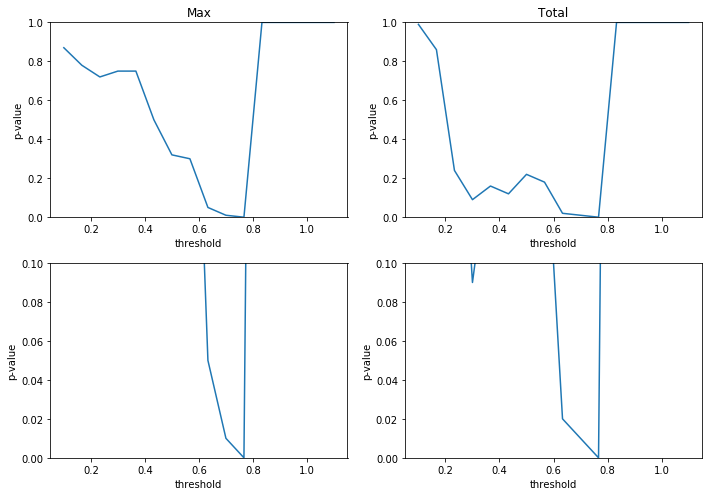

In [9]:
path_to_file = "C:/Users/123/Desktop/My_work/from_bigwin/250_40_1544682905 Grouping_Scan.DAT"
path_to_folder = "C:/Users/123/Desktop/My_work/from_bigwin/250_40/"
genotype = "Siberian"
threshold_list = [0.1 + i/15 for i in range(16)]
p_val_max_list = []
p_val_total_list = []
list_with_lists = []
for threshold in threshold_list:
    m, t, l = wrapper(path_to_file, path_to_folder, genotype, threshold)
    p_val_max_list.append(m)
    p_val_total_list.append(t)
    list_with_lists.append(l)
plt.figure(figsize=(10,7))
plt.subplot(2, 2, 1)
plt.xlabel("threshold")
plt.ylabel("p-value")
plt.title("Max")
plt.plot(threshold_list,p_val_max_list)
plt.ylim((0,1))
plt.subplot(2, 2, 2)
plt.xlabel("threshold")
plt.ylabel("p-value")
plt.ylim((0,1))
plt.title("Total")
plt.plot(threshold_list,p_val_total_list)
plt.subplot(2, 2, 3)
plt.xlabel("threshold")
plt.ylabel("p-value")
plt.plot(threshold_list,p_val_max_list)
plt.ylim((0,0.1))
plt.subplot(2, 2, 4)
plt.xlabel("threshold")
plt.ylabel("p-value")
plt.ylim((0,0.1))
plt.plot(threshold_list,p_val_total_list)
plt.tight_layout()

(array([ 32.,  27.,  17.,  15.,   5.,   3.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

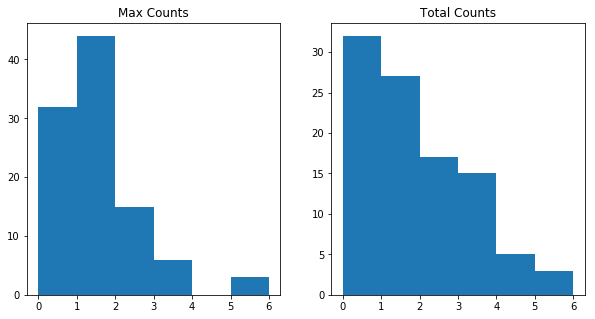

In [99]:
for i in range(20)
    plt.figure(figsize=(10,5))
    z = [i[0] for i in list_with_lists[10]]
    plt.subplot(1, 2, 1)
    plt.title("Max Counts")
    plt.hist(z, bins = [0,1,2,3,4,5,6])
    x = [i[1] for i in list_with_lists[10]]
    plt.subplot(1, 2, 2)
    plt.title("Total Counts")
    plt.hist(x, bins = [0,1,2,3,4,5,6])

In [ ]:
path_to_file = "C:/Users/123/Desktop/My_work/from_bigwin/250_40_1544682905 Grouping_Scan.DAT"
path_to_folder = "C:/Users/123/Desktop/My_work/from_bigwin/250_40/"
with open(path_to_file) as file:
        table = pd.read_csv(file, sep='\t')
    list_with_results.append(length_of_signal("Siberian", 0.6, "max"))
list_with_files = []
for root, directory, filename in os.walk(path):
    for name in filename:
        if "Raw_Data" in name:
            ind = filename.index(name)
            del(filename[ind])
    list_with_files = filename[:]
list_with_results = []
for scan in list_with_files:
    with open(os.path.join(path+scan)) as file:
        table = pd.read_csv(file, sep='\t')
    list_with_results.append(length_of_signal("Siberian", 0.6, "max"))

In [4]:
path = "C:/Users/123/Desktop/My_work/from_bigwin/250_40/"
list_with_files = []
for root, directory, filename in os.walk(path):
    for name in filename:
        if "Raw_Data" in name:
            ind = filename.index(name)
            del(filename[ind])
    list_with_files = filename[:]
list_with_results = []
for scan in list_with_files:
    with open(os.path.join(path+scan)) as file:
        table = pd.read_csv(file, sep='\t')
    list_with_results.append(length_of_signal("Siberian", 0.6, "max"))

In [5]:
print(len(list_with_results))

87


In [106]:
print(list_with_results)

[9, 5, 3, 3, 9, 4, 3, 2, 7, 4, 2, 2, 3, 1, 2, 0, 0, 0, 0, 0]


In [105]:
path = "C:/Users/123/Desktop/My_work/from_bigwin/testing_for_signal/"
list_with_files = []
for root, directory, filename in os.walk(path):
    for name in filename:
        if "Raw_Data" in name:
            ind = filename.index(name)
            del(filename[ind])
    list_with_files = filename[:]
list_with_results = []
for scan in list_with_files:
    with open(os.path.join(path+scan)) as file:
        table = pd.read_csv(file, sep='\t')
    list_with_results.append(length_of_signal("Siberian", 0.6, "max"))